<a href="https://colab.research.google.com/github/thiagosdfc/Saude/blob/main/Atividade03_TEAMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
# Importando Bibliotecas
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sea

In [114]:
# Carregar o dataset Breast Cancer Wisconsin
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()


In [128]:
# Carregar meu txt de teste
tf = pd.read_csv('/content/wdbc2.txt', delimiter=',',header=0)
print(tf)

           ID  Diagnosis  radius1  texture1  perimeter1   area1  smoothness1  \
0      842302          1    17.99     10.38      122.80  1001.0      0.11840   
1      842517          1    20.57     17.77      132.90  1326.0      0.08474   
2    84300903          1    19.69     21.25      130.00  1203.0      0.10960   
3    84348301          1    11.42     20.38       77.58   386.1      0.14250   
4    84358402          1    20.29     14.34      135.10  1297.0      0.10030   
..        ...        ...      ...       ...         ...     ...          ...   
564    926424          1    21.56     22.39      142.00  1479.0      0.11100   
565    926682          1    20.13     28.25      131.20  1261.0      0.09780   
566    926954          1    16.60     28.08      108.30   858.1      0.08455   
567    927241          1    20.60     29.33      140.10  1265.0      0.11780   
568     92751          0     7.76     24.54       47.92   181.0      0.05263   

     compactness1  concavity1  concave_

In [151]:
# Segmentando a coluna de Diagnóstico em Benigno e Maligno
tf['Benigno'] = (tf['Diagnosis'] == 0).astype(int)
tf['Maligno'] = (tf['Diagnosis'] == 1).astype(int)
print(tf)


           ID  Diagnosis  radius1  texture1  perimeter1   area1  smoothness1  \
0      842302          1    17.99     10.38      122.80  1001.0      0.11840   
1      842517          1    20.57     17.77      132.90  1326.0      0.08474   
2    84300903          1    19.69     21.25      130.00  1203.0      0.10960   
3    84348301          1    11.42     20.38       77.58   386.1      0.14250   
4    84358402          1    20.29     14.34      135.10  1297.0      0.10030   
..        ...        ...      ...       ...         ...     ...          ...   
564    926424          1    21.56     22.39      142.00  1479.0      0.11100   
565    926682          1    20.13     28.25      131.20  1261.0      0.09780   
566    926954          1    16.60     28.08      108.30   858.1      0.08455   
567    927241          1    20.60     29.33      140.10  1265.0      0.11780   
568     92751          0     7.76     24.54       47.92   181.0      0.05263   

     compactness1  concavity1  concave_

In [179]:
# Importa somente as 10 colunas do Dataset junto com o diagnóstico
colunas_desejadas = ['Benigno','Maligno','radius1','texture1','perimeter1','area1','smoothness1','compactness1','concavity1','concave_points1','symmetry1','fractal_dimension1']
novotf = tf[colunas_desejadas]
print(novotf)

     Benigno  Maligno  radius1  texture1  perimeter1   area1  smoothness1  \
0          0        1    17.99     10.38      122.80  1001.0      0.11840   
1          0        1    20.57     17.77      132.90  1326.0      0.08474   
2          0        1    19.69     21.25      130.00  1203.0      0.10960   
3          0        1    11.42     20.38       77.58   386.1      0.14250   
4          0        1    20.29     14.34      135.10  1297.0      0.10030   
..       ...      ...      ...       ...         ...     ...          ...   
564        0        1    21.56     22.39      142.00  1479.0      0.11100   
565        0        1    20.13     28.25      131.20  1261.0      0.09780   
566        0        1    16.60     28.08      108.30   858.1      0.08455   
567        0        1    20.60     29.33      140.10  1265.0      0.11780   
568        1        0     7.76     24.54       47.92   181.0      0.05263   

     compactness1  concavity1  concave_points1  symmetry1  fractal_dimensio

In [154]:
# Escalar os dados (normalização)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(novotf)

In [208]:
# Definir o número de clusters (K) - valor inicial
k = 2

In [209]:
# Aplicar o KMeans
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_data)

KMeans(n_clusters=2, random_state=42)

In [210]:
# Insere nova coluna informando o cluster onde a variável se encontra
novotf['Cluster'] = kmeans.labels_

<ipython-input-210-7c9f6564bfbd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  novotf['Cluster'] = kmeans.labels_


In [211]:
print(novotf)

     Benigno  Maligno  radius1  texture1  perimeter1   area1  smoothness1  \
0          0        1    17.99     10.38      122.80  1001.0      0.11840   
1          0        1    20.57     17.77      132.90  1326.0      0.08474   
2          0        1    19.69     21.25      130.00  1203.0      0.10960   
3          0        1    11.42     20.38       77.58   386.1      0.14250   
4          0        1    20.29     14.34      135.10  1297.0      0.10030   
..       ...      ...      ...       ...         ...     ...          ...   
564        0        1    21.56     22.39      142.00  1479.0      0.11100   
565        0        1    20.13     28.25      131.20  1261.0      0.09780   
566        0        1    16.60     28.08      108.30   858.1      0.08455   
567        0        1    20.60     29.33      140.10  1265.0      0.11780   
568        1        0     7.76     24.54       47.92   181.0      0.05263   

     compactness1  concavity1  concave_points1  symmetry1  fractal_dimensio

In [212]:
# Reduzir a dimensionalidade para 2 componentes principais (PCA)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
novotf['PCA1'] = pca_data[:, 0]
novotf['PCA2'] = pca_data[:, 1]

<ipython-input-212-5838505d2637>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  novotf['PCA1'] = pca_data[:, 0]
<ipython-input-212-5838505d2637>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  novotf['PCA2'] = pca_data[:, 1]


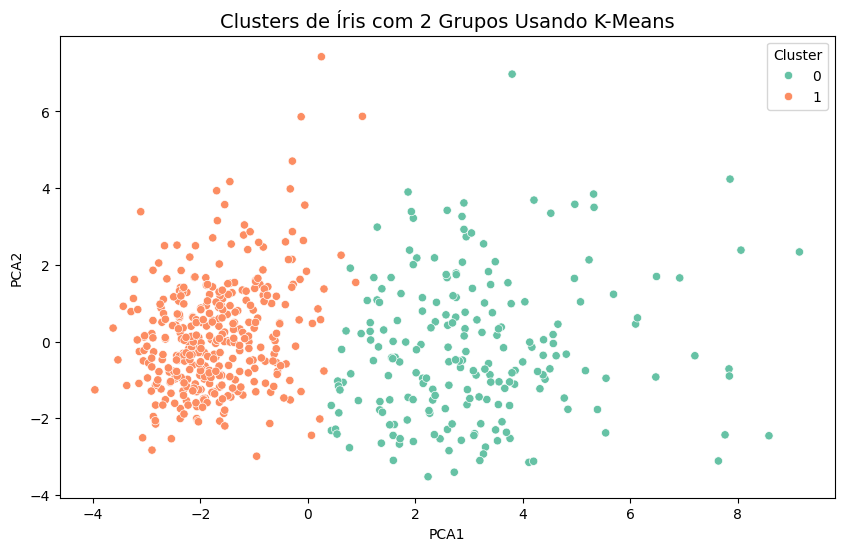

In [213]:
# Visualização dos clusters em 2D com base no PCA
plt.figure(figsize=(10, 6))
sea.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=novotf, palette='Set2')
plt.title(f'Clusters de Íris com {k} Grupos Usando K-Means', fontsize=14)
plt.show()

In [214]:
# Verificar o número de amostras em cada cluster
print(novotf['Cluster'].value_counts())

Cluster
1    363
0    206
Name: count, dtype: int64


Cluster 1: Tumores Malignos (357 observações)

Cluster 2: Tumores Benignos (212 observações)

In [215]:
#Restringindo o segundo Cluster
segundo_cluster = novotf[novotf['Cluster'] == 1]
print(segundo_cluster)

     Benigno  Maligno  radius1  texture1  perimeter1  area1  smoothness1  \
19         1        0   13.540     14.36       87.46  566.3      0.09779   
20         1        0   13.080     15.71       85.63  520.0      0.10750   
21         1        0    9.504     12.44       60.34  273.9      0.10240   
37         1        0   13.030     18.42       82.61  523.8      0.08983   
38         0        1   14.990     25.20       95.54  698.8      0.09387   
..       ...      ...      ...       ...         ...    ...          ...   
558        1        0   14.590     22.68       96.39  657.1      0.08473   
559        1        0   11.510     23.93       74.52  403.5      0.09261   
560        1        0   14.050     27.15       91.38  600.4      0.09929   
561        1        0   11.200     29.37       70.67  386.0      0.07449   
568        1        0    7.760     24.54       47.92  181.0      0.05263   

     compactness1  concavity1  concave_points1  symmetry1  fractal_dimension1  \
19    

In [216]:
# Correlação das variáveis do segundo Cluster
matriz_correlacao = segundo_cluster.corr()
print(matriz_correlacao)

                     Benigno   Maligno   radius1  texture1  perimeter1  \
Benigno             1.000000 -1.000000 -0.117283 -0.126241   -0.110023   
Maligno            -1.000000  1.000000  0.117283  0.126241    0.110023   
radius1            -0.117283  0.117283  1.000000 -0.020456    0.997111   
texture1           -0.126241  0.126241 -0.020456  1.000000   -0.024789   
perimeter1         -0.110023  0.110023  0.997111 -0.024789    1.000000   
area1              -0.125527  0.125527  0.994426 -0.021300    0.990798   
smoothness1         0.030116 -0.030116 -0.187228 -0.232613   -0.149984   
compactness1        0.079186 -0.079186  0.036765 -0.073935    0.107891   
concavity1          0.016723 -0.016723  0.067933 -0.033652    0.123541   
concave_points1    -0.033127  0.033127  0.405571 -0.143900    0.456121   
symmetry1           0.058587 -0.058587 -0.240439 -0.073767   -0.213975   
fractal_dimension1  0.096758 -0.096758 -0.552189 -0.103365   -0.502281   
Cluster                  NaN       NaN

De acordo com a matriz de correlação realizada para o Cluster 2, vemos que existe uma relação forte somente entre as variáveis: Área x Raio, Área x Perímetro e Perímetro x Raio. As demais variáveis não possuem relação forte.

In [217]:
# Estatíticas para o segundo cluster
estatisticas = segundo_cluster.describe()
print(estatisticas)

          Benigno     Maligno     radius1    texture1  perimeter1       area1  \
count  363.000000  363.000000  363.000000  363.000000  363.000000  363.000000   
mean     0.980716    0.019284   12.169860   17.980744   78.201460  464.688705   
std      0.137710    0.137710    1.782369    4.008222   11.783515  134.711222   
min      0.000000    0.000000    6.981000    9.710000   43.790000  143.500000   
25%      1.000000    0.000000   11.130000   15.165000   70.935000  379.350000   
50%      1.000000    0.000000   12.210000   17.460000   78.290000  460.300000   
75%      1.000000    0.000000   13.415000   19.860000   86.210000  552.950000   
max      1.000000    1.000000   17.850000   33.810000  114.600000  992.100000   

       smoothness1  compactness1  concavity1  concave_points1   symmetry1  \
count   363.000000    363.000000  363.000000       363.000000  363.000000   
mean      0.092461      0.079319    0.045247         0.025643    0.173994   
std       0.013353      0.032731    0.0

In [204]:
# Correlação das variáveis do Primeiro Cluster
primeiro_cluster = novotf[novotf['Cluster'] == 0]
matriz_correlacao1 = primeiro_cluster.corr()
print(matriz_correlacao1)

                    Benigno  Maligno   radius1  texture1  perimeter1  \
Benigno                 NaN      NaN       NaN       NaN         NaN   
Maligno                 NaN      NaN       NaN       NaN         NaN   
radius1                 NaN      NaN  1.000000  0.068171    0.998004   
texture1                NaN      NaN  0.068171  1.000000    0.065199   
perimeter1              NaN      NaN  0.998004  0.065199    1.000000   
area1                   NaN      NaN  0.994014  0.073999    0.992544   
smoothness1             NaN      NaN -0.239607 -0.077620   -0.206150   
compactness1            NaN      NaN  0.134321 -0.007441    0.187523   
concavity1              NaN      NaN  0.477380  0.101277    0.519140   
concave_points1         NaN      NaN  0.663696  0.014500    0.694523   
symmetry1               NaN      NaN -0.106515 -0.152164   -0.086824   
fractal_dimension1      NaN      NaN -0.564806 -0.066247   -0.531540   
Cluster                 NaN      NaN       NaN       NaN        

No primeiro Cluster encontramos correlação entre as mesmas variáveis: Área, Perímetro e Raio.

In [218]:
# Estatíticas para o primeiro cluster
estatisticas1 = primeiro_cluster.describe()
print(estatisticas1)

       Benigno  Maligno     radius1    texture1  perimeter1        area1  \
count    129.0    129.0  129.000000  129.000000  129.000000   129.000000   
mean       0.0      1.0   17.239380   21.654419  112.625969   946.950388   
std        0.0      0.0    2.588357    3.648012   17.180573   284.372162   
min        0.0      1.0   10.950000   14.340000   71.900000   371.100000   
25%        0.0      1.0   15.100000   19.620000   98.000000   712.800000   
50%        0.0      1.0   17.300000   21.460000  113.000000   930.900000   
75%        0.0      1.0   19.210000   23.240000  126.500000  1152.000000   
max        0.0      1.0   23.510000   39.280000  155.100000  1747.000000   

       smoothness1  compactness1  concavity1  concave_points1   symmetry1  \
count   129.000000    129.000000  129.000000       129.000000  129.000000   
mean      0.096712      0.112262    0.119615         0.071806    0.180395   
std       0.009462      0.026686    0.042460         0.023066    0.018716   
min    

In [206]:
# Tentativa com valores de K diferentes e usando a métrica do método Elbow
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

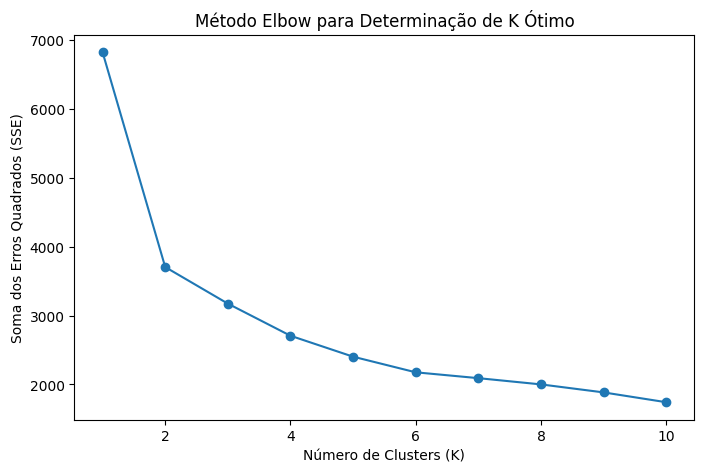

In [219]:
# Visualização do método Elbow
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.title('Método Elbow para Determinação de K Ótimo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Soma dos Erros Quadrados (SSE)')
plt.show()

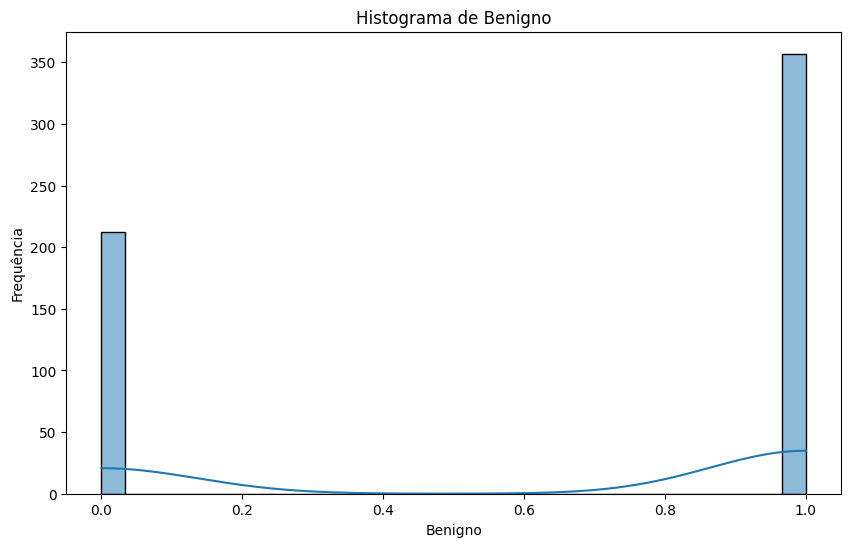

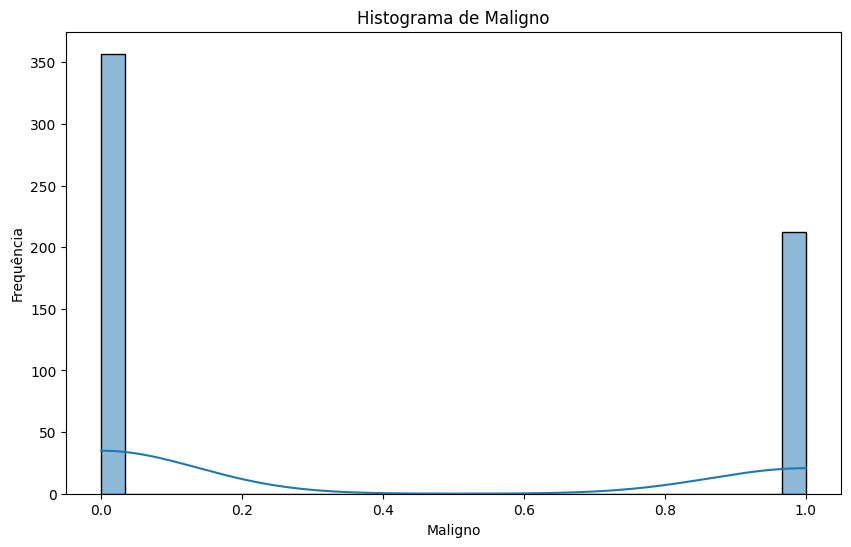

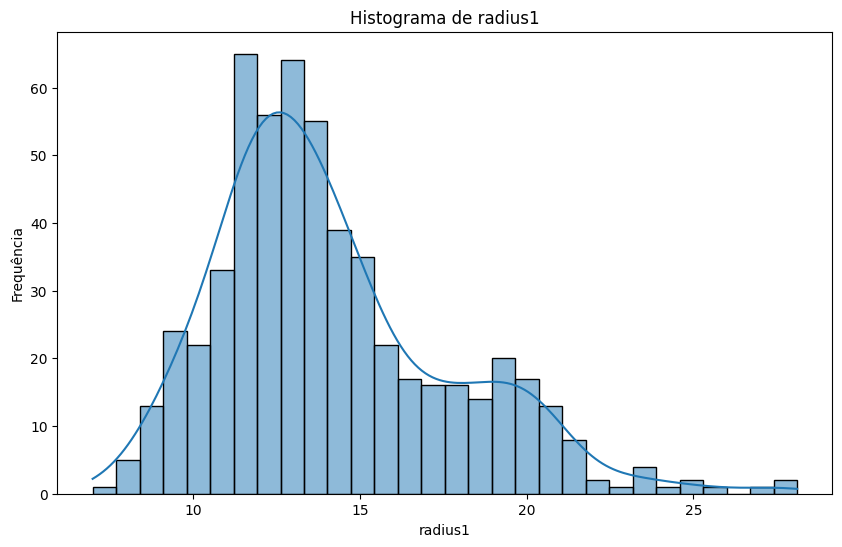

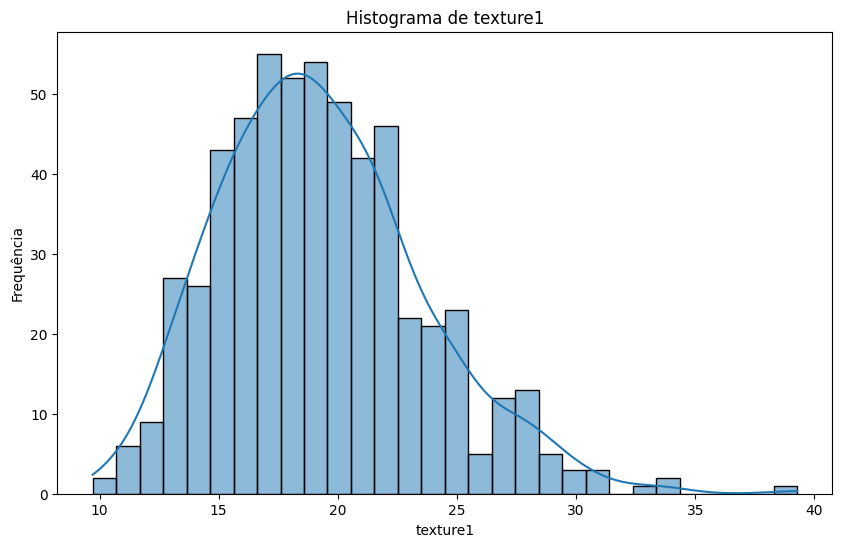

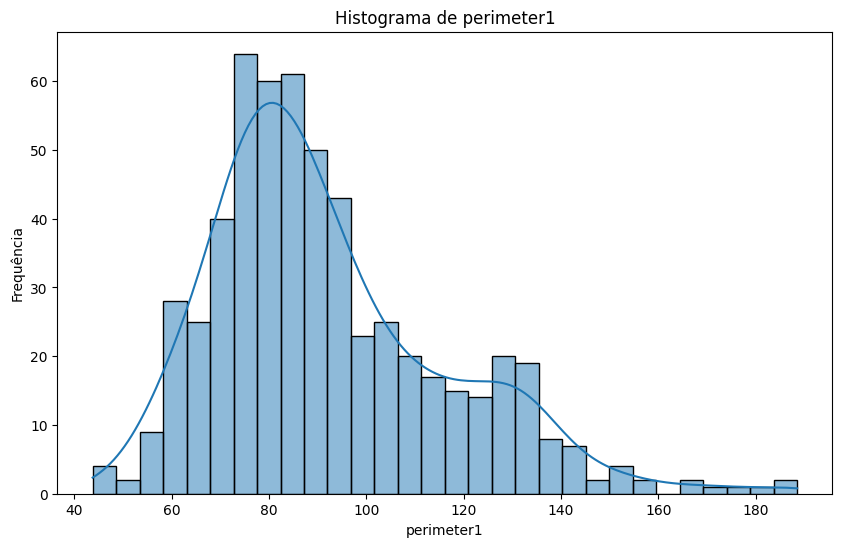

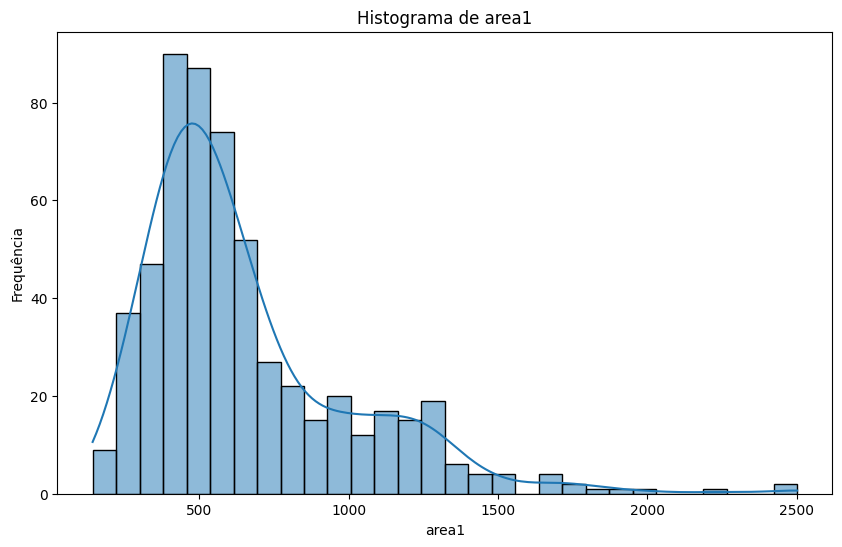

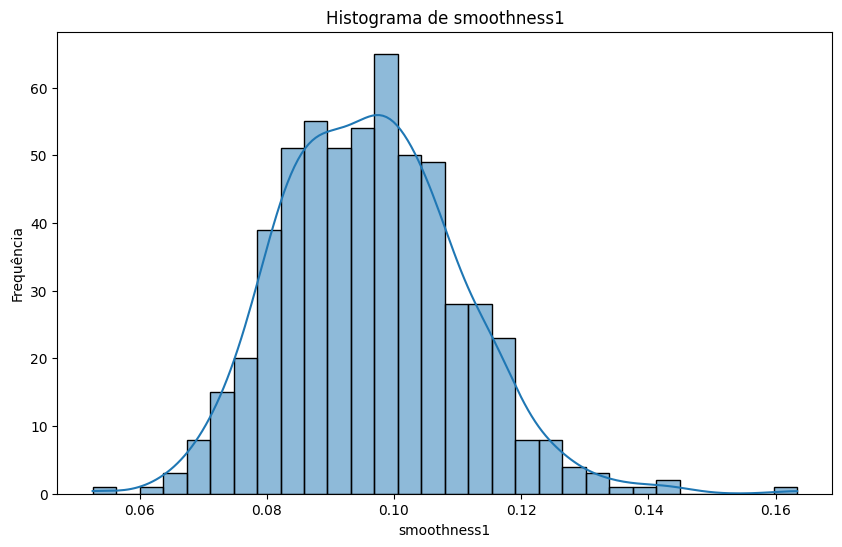

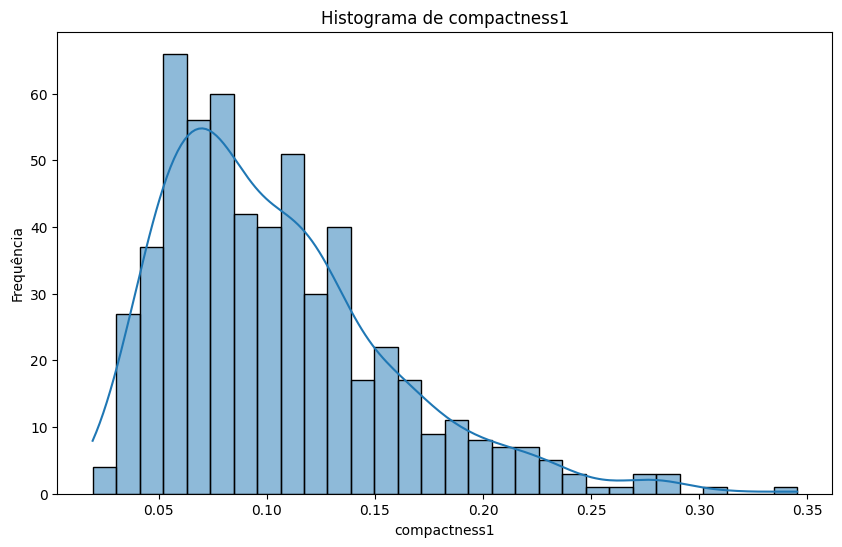

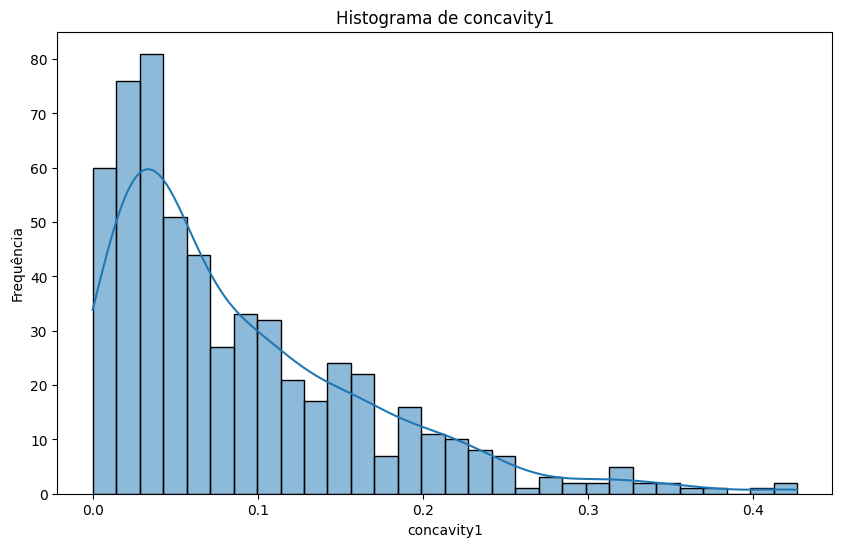

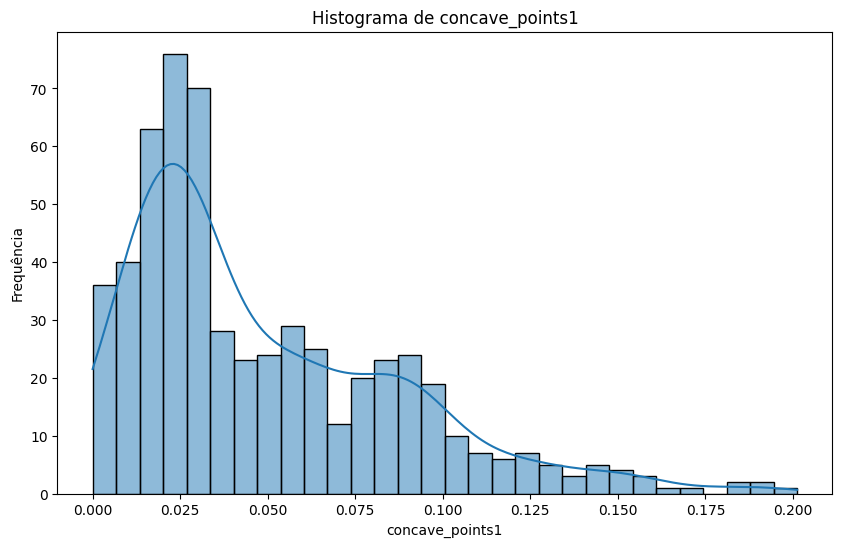

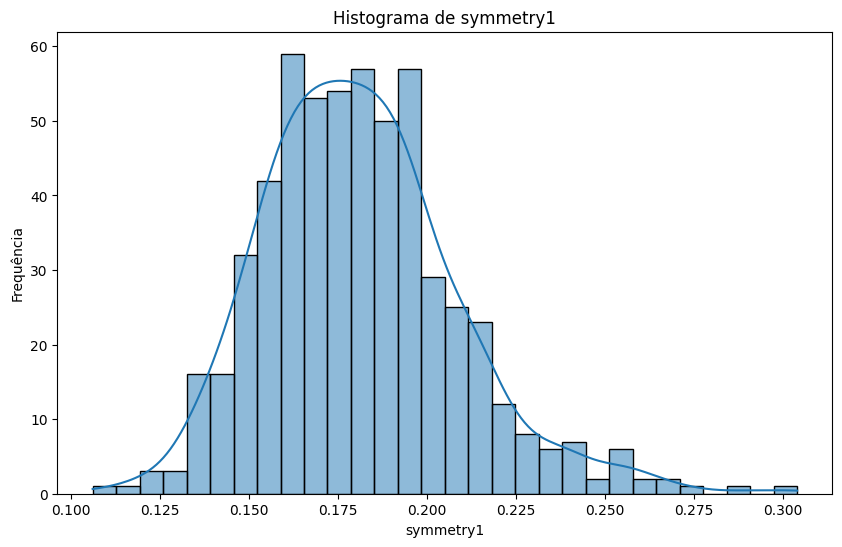

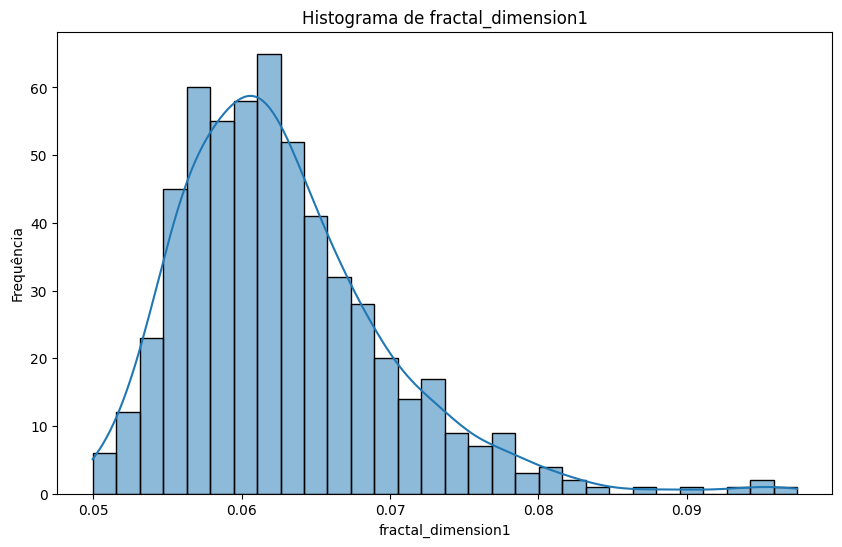

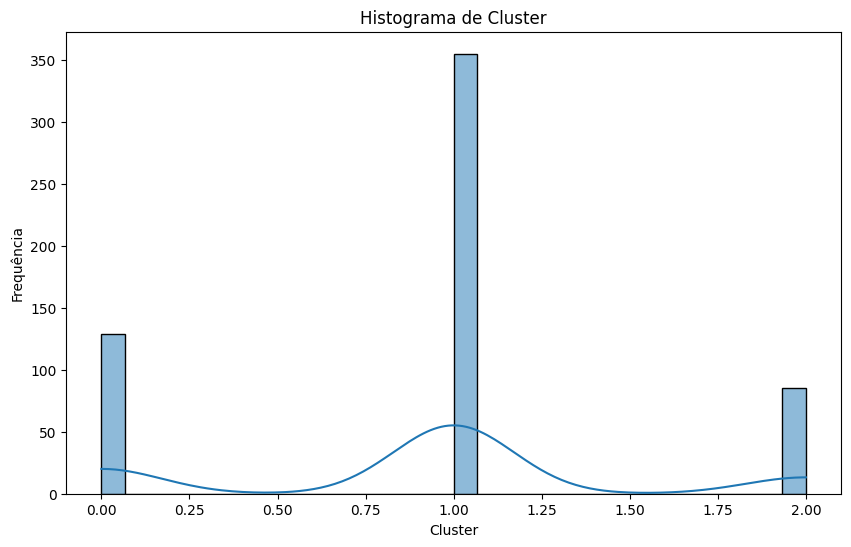

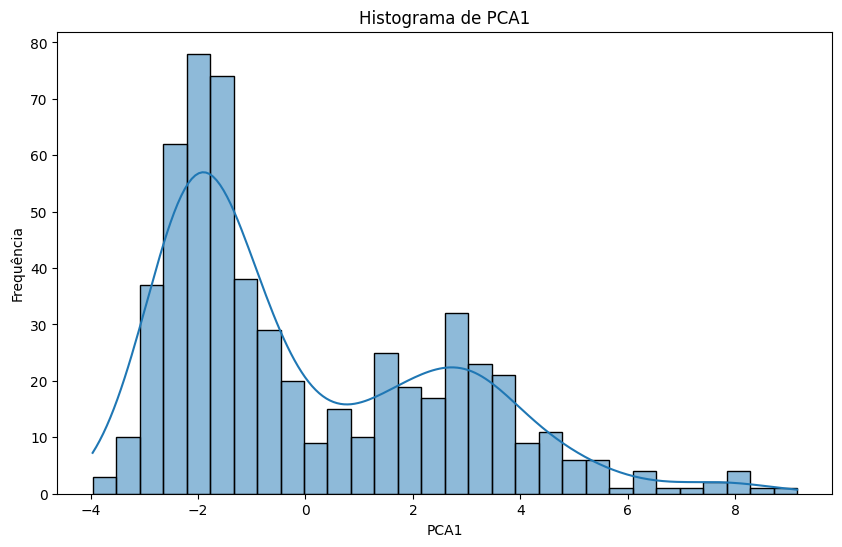

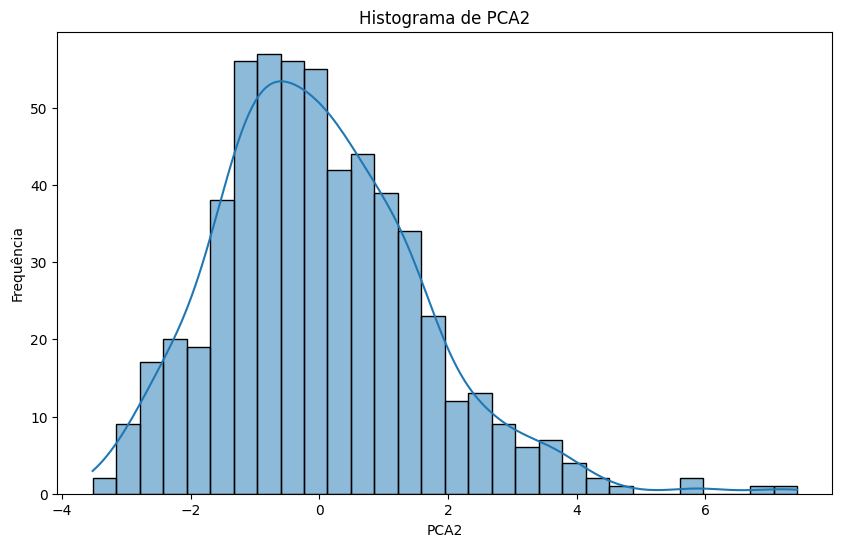

In [170]:
# Criar histogramas para cada variável
for column in novotf.columns:
    plt.figure(figsize=(10, 6))
    sea.histplot(novotf[column], bins=30, kde=True)
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frequência')
    plt.show()

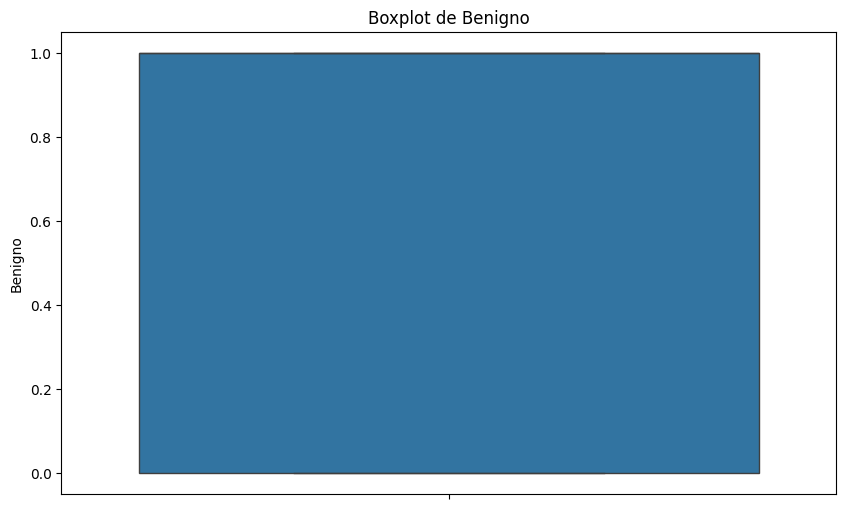

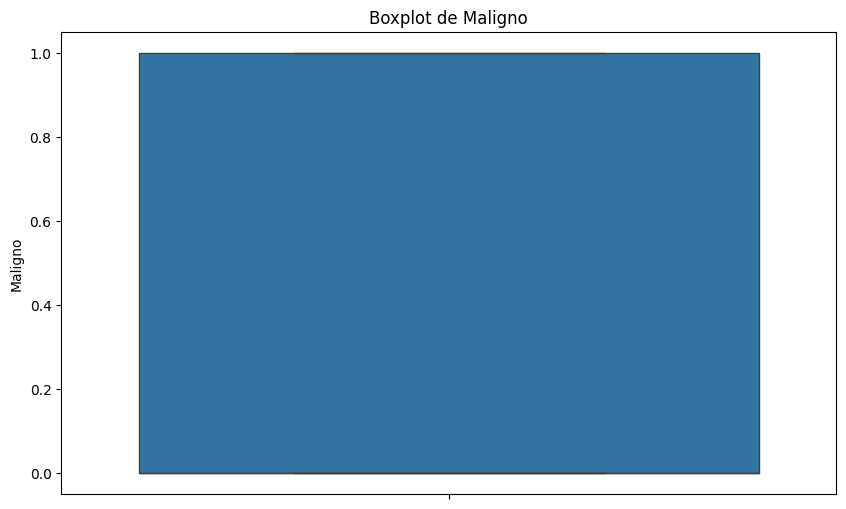

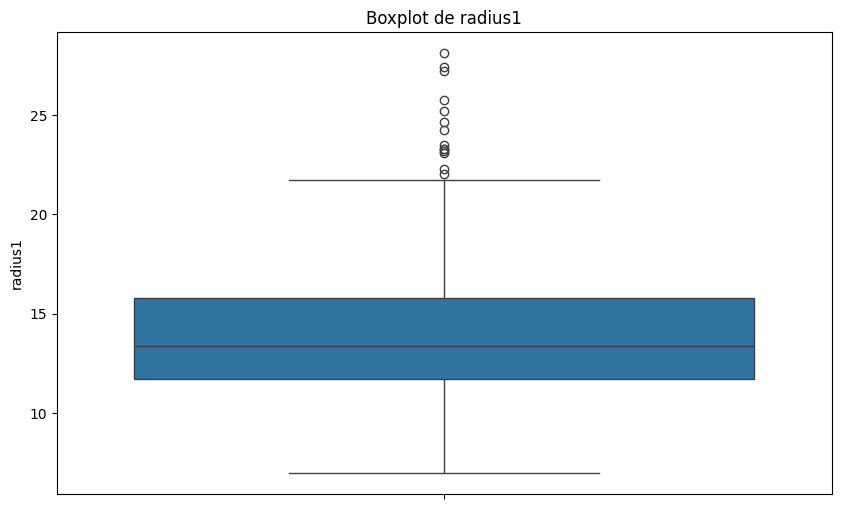

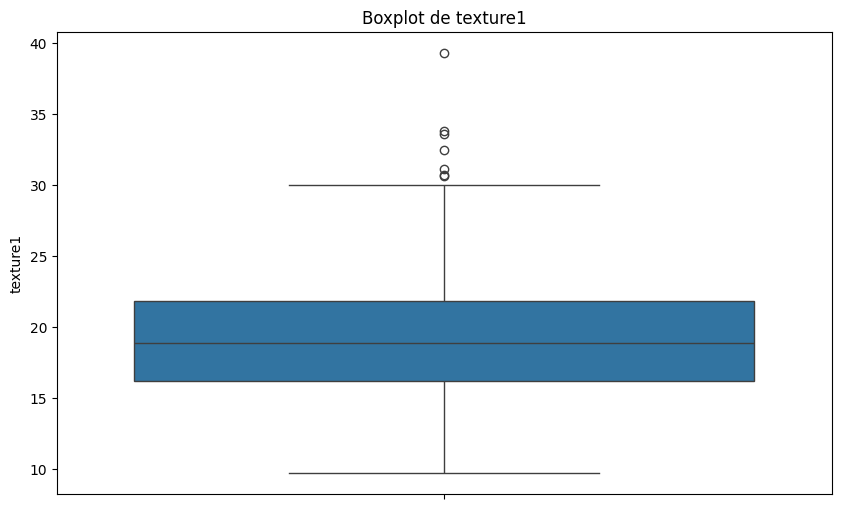

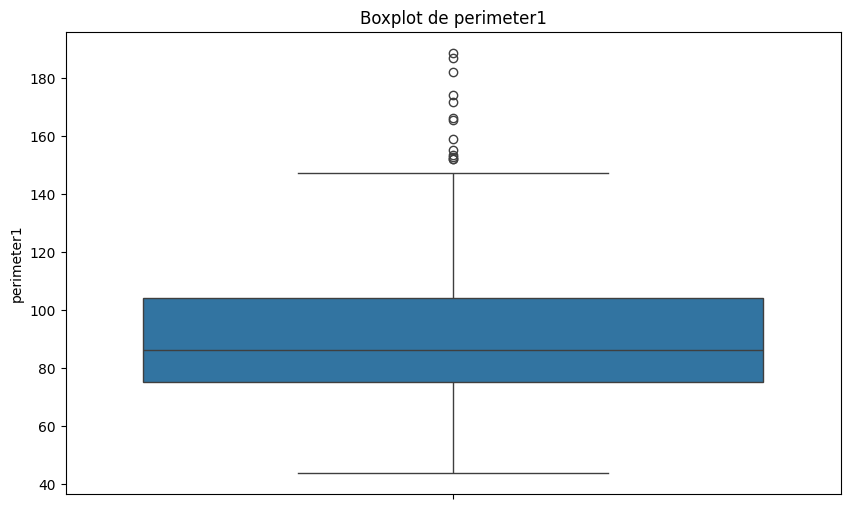

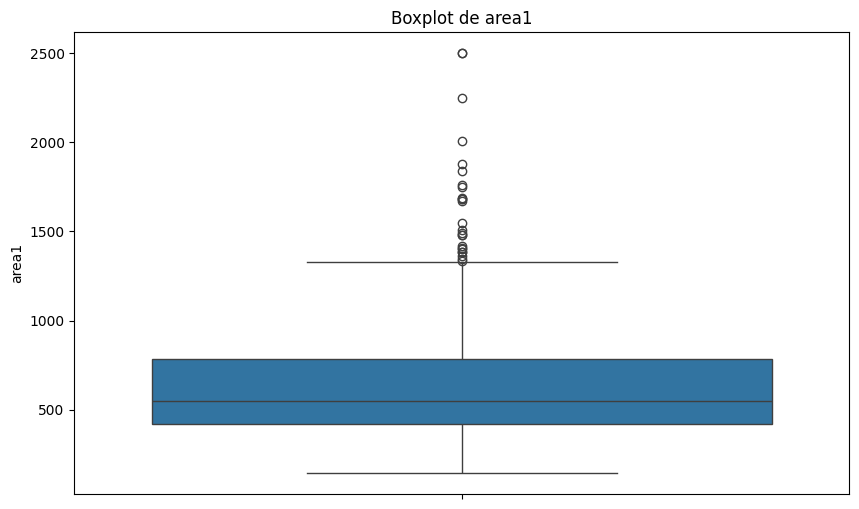

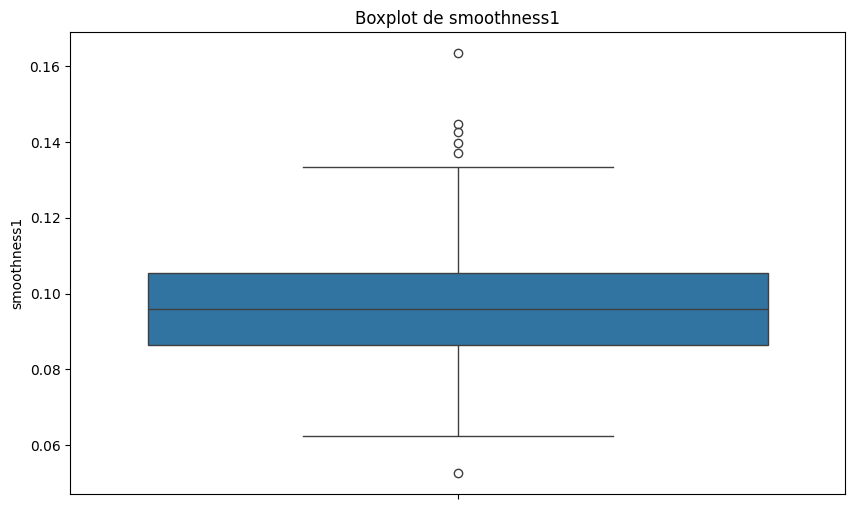

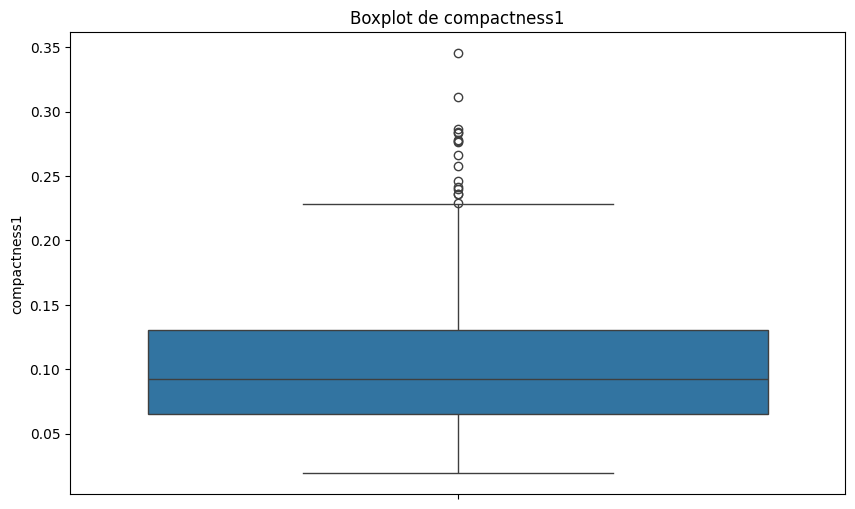

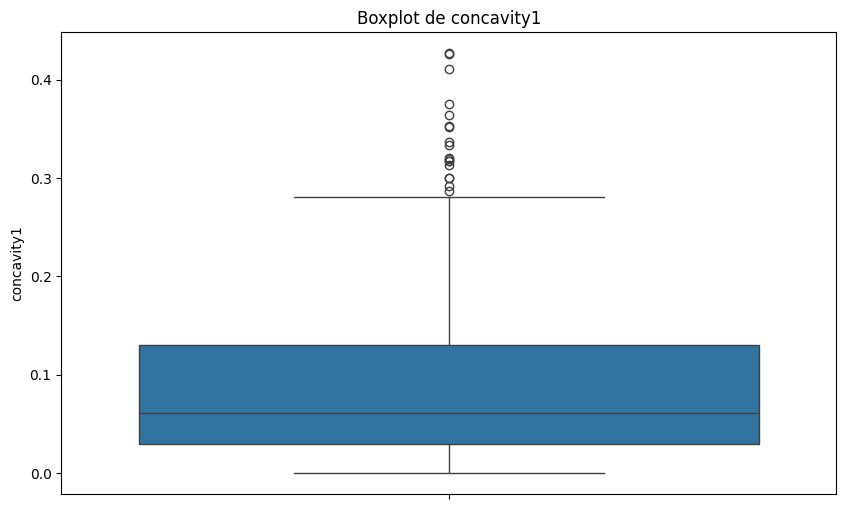

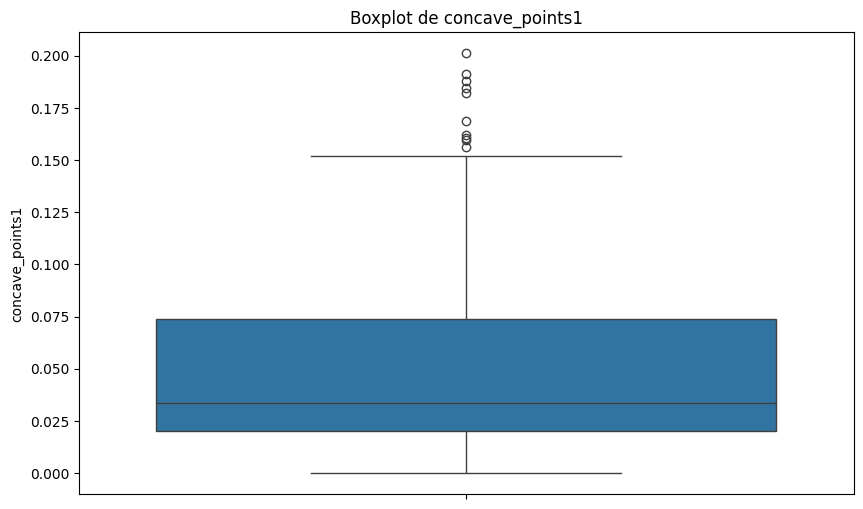

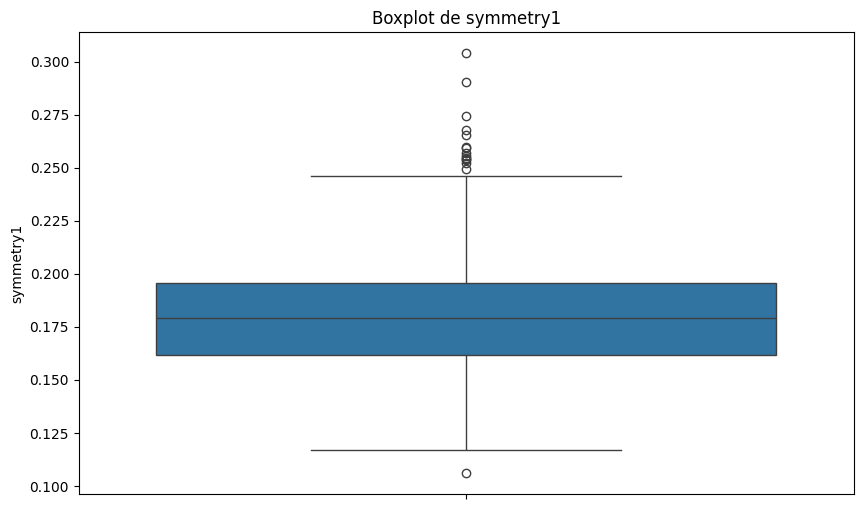

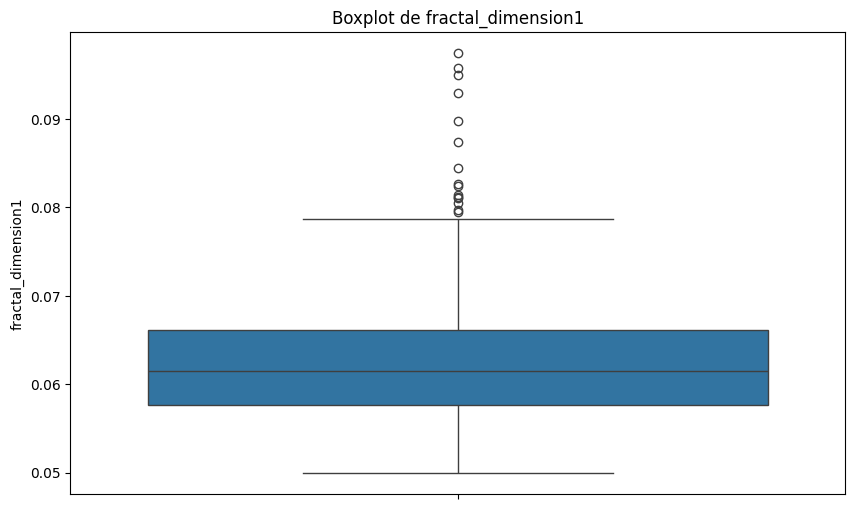

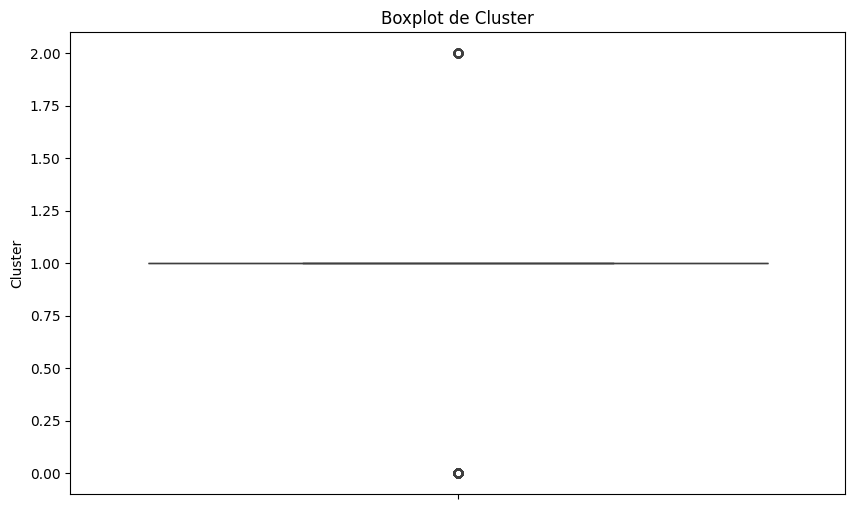

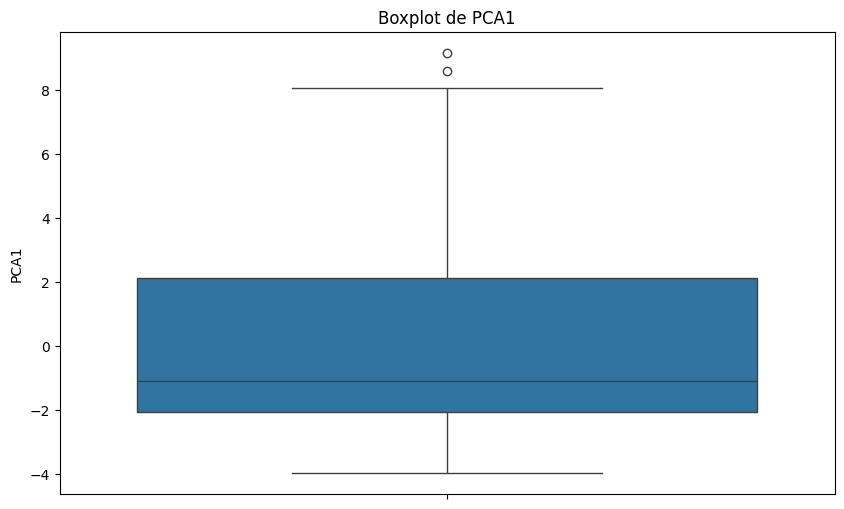

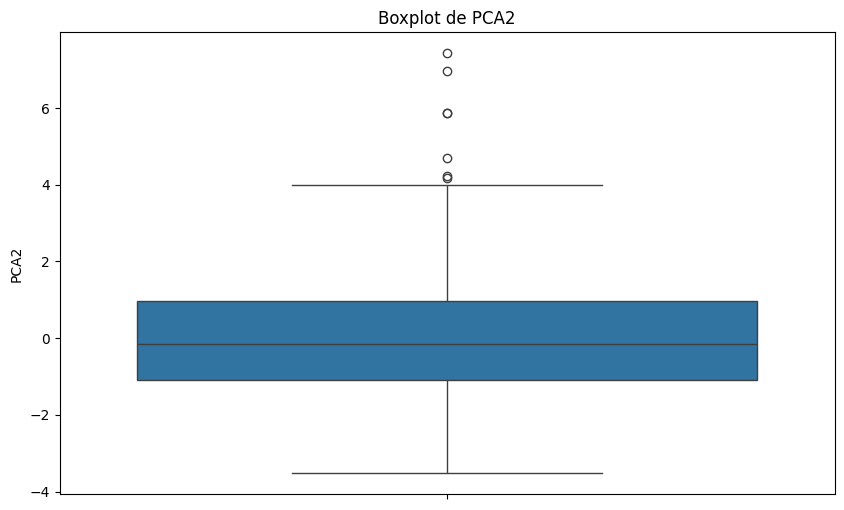

In [171]:
for column in novotf.columns:
    plt.figure(figsize=(10, 6))
    sea.boxplot(y=novotf[column])
    plt.title(f'Boxplot de {column}')
    plt.ylabel(column)
    plt.show()

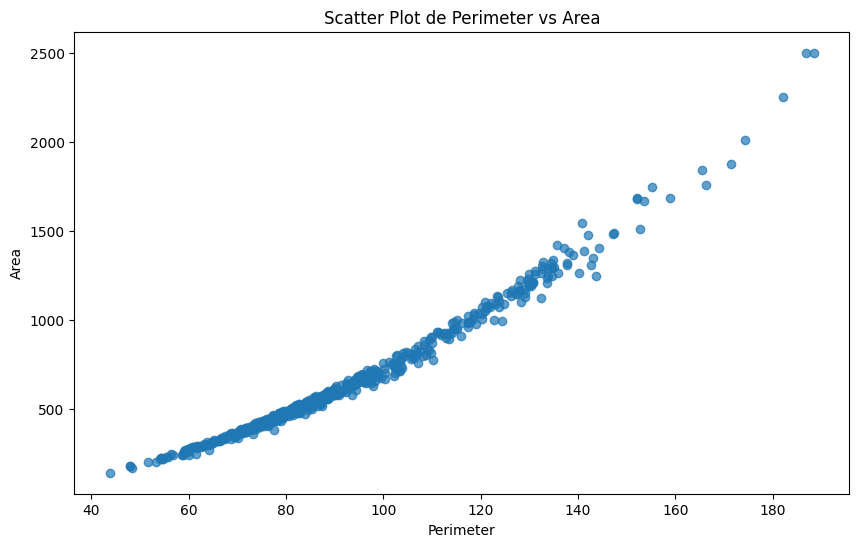

In [110]:
# Scatter Plots entre as variáveis de maior correlação:
plt.figure(figsize=(10, 6))
plt.scatter(novodf['mean perimeter'], novodf['mean area'], alpha=0.7)
plt.title('Scatter Plot de Perimeter vs Area')
plt.xlabel('Perimeter')
plt.ylabel('Area')
plt.show()

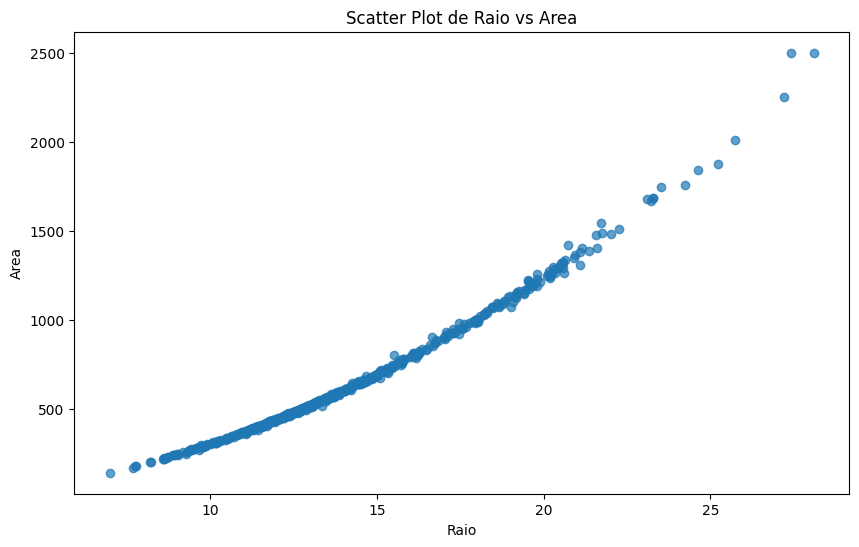

In [111]:
# Scatter Plots entre as variáveis de maior correlação:
plt.figure(figsize=(10, 6))
plt.scatter(novodf['mean radius'], novodf['mean area'], alpha=0.7)
plt.title('Scatter Plot de Raio vs Area')
plt.xlabel('Raio')
plt.ylabel('Area')
plt.show()

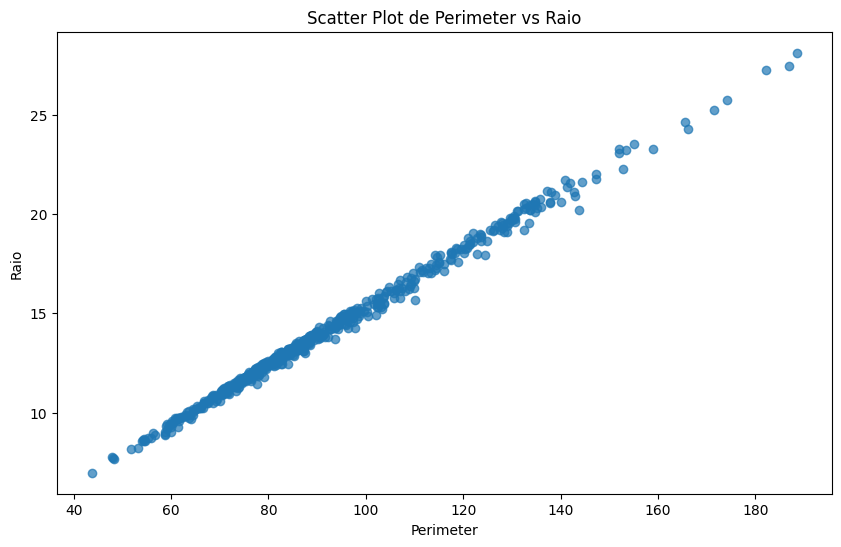

In [112]:
# Scatter Plots entre as variáveis de maior correlação:
plt.figure(figsize=(10, 6))
plt.scatter(novodf['mean perimeter'], novodf['mean radius'], alpha=0.7)
plt.title('Scatter Plot de Perimeter vs Raio')
plt.xlabel('Perimeter')
plt.ylabel('Raio')
plt.show()

Com base no Dataset Breast Cancer Wisconsin foi possível fazer uma análise dos dados. Os dados do dataset, em geral, são normalmente distribuídos, porém com uma assimetria a esquerda, ou seja, tendem a valores abaixo da média. Isso ocorre em quase todas as variáveis. Foram segmentados dois grupos em dois Clusters: um para tumores malignos e outro para tumores benignos. Buscamos fazer uma análise em cada um dos clusteres para entender se existia relação entre as variáveis. Foi feita uma correlação para os dois grupos e, em ambos, vericamos que há uma relação forte entre: a área do tumor, perímetro e raio. Isso pode ser comprovado no Scatter Plot acima. Quando analisamos as estatísticas descritivas de cada grupo, obsersamos que o grupo de tumor "maligno" possui variações significativas em relação ao grupo benigno. Por exemplo, no grupo "Maligno" o raio do tumor é 39,8% maior comparado ao "Benigno", o Perímetro é 44% maior e a área do tumor é mais que o dobro, com 103% ao compararmos a média de ambos os grupos. Podemos concluir então que os parâmetros: área, perímetro e raio são variáveis que devem ser levadas em conta quando se busca suspeita de malignidade em tumores de câncer de pulmão.